In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.dates as matDates
import time

def sign(x):
    if x >= 0:
        return 1
    elif x < 0:
        #return -1
        return 0

In [2]:
x = pd.read_csv('SentimentSingleNewsFullNoNorm/AAPL.csv')
x.drop('Unnamed: 0', axis=1, inplace=True)
x = x.rename(index=str, columns={"initTime": "PUBLICATION_DATE"})
x = x.sort_values(by=['PUBLICATION_DATE'])
x = x.reset_index(drop=True)
y =  pd.read_csv('DataSetIndexes/indexesAAPL.csv')
for i, row in x.iterrows():
    x.at[i,'PUBLICATION_DATE'] =datetime.strptime(x['PUBLICATION_DATE'][i], '%Y-%m-%d %H:%M:%S')

momentum_window = 30
y = y.rename(index=str, columns={"Unnamed: 0": "DATE"})

for i, row in y.iterrows():
    y['DATE'].at[i] = datetime.strptime(y['DATE'][i], '%Y-%m-%d %H:%M:%S') 
z = list()
for i in range(0,y.shape[0]-momentum_window):
    z.append((y['close'][i] - y['close'][i-momentum_window])/y['close'][i])

y = y.reset_index(drop=True)
y.drop(np.arange(y.shape[0]-momentum_window, y.shape[0]), inplace=True)
y = y.reset_index(drop=True)
y['labels'] = [sign(entry) for entry in z]
min_max_scaler = preprocessing.MinMaxScaler()

X_window_average = 30
# x['CONSTRAINING'] = x['CONSTRAINING'].rolling(window=X_window_average,center=False).mean()
# x['LITIGIOUS'] = x['LITIGIOUS'].rolling(window=X_window_average,center=False).mean()
# x['NEGATIVE'] = x['NEGATIVE'].rolling(window=X_window_average,center=False).mean()
# x['POSITIVE'] = x['POSITIVE'].rolling(window=X_window_average,center=False).mean()
# x['UNCERTAINTY'] = x['UNCERTAINTY'].rolling(window=X_window_average,center=False).mean()
# x['SUPERFLUOUS'] = x['SUPERFLUOUS'].rolling(window=X_window_average,center=False).mean()
# x['INTERESTING'] = x['INTERESTING'].rolling(window=X_window_average,center=False).mean()

initDate = max(y['DATE'][0], x['PUBLICATION_DATE'][0])
finalDate = min(y['DATE'][len(y)-1], x['PUBLICATION_DATE'][len(x)-1])
i = 0
j = 0

close = []
labels = []
pos = []
neg = []

dates = []
# ALLINEAMENTO INIZIO
while(y['DATE'][j] < initDate):
    j+=1
while(x['PUBLICATION_DATE'][i] < initDate):
    i+=1

while(x['PUBLICATION_DATE'][i] < finalDate and y['DATE'][j] < finalDate ):
    timeSlotPos = list()
    timeSlotNeg = list()
    while(i<len(x)-1 and y['DATE'][j] > x['PUBLICATION_DATE'][i]):
        timeSlotPos.append(x['POSITIVE'][i])
        timeSlotNeg.append(x['NEGATIVE'][i])
        i+=1
    if(len(timeSlotPos)==0):
        timeSlotPos.append(0)
        timeSlotNeg.append(0)
    pos.append(np.mean(np.asarray(timeSlotPos), axis=0))  
    neg.append(np.mean(np.asarray(timeSlotNeg), axis=0))   
    
    close.append(y['close'][j])
    labels.append(y['labels'][j])
    dates.append(str(y['DATE'][j].day)+'/'+str(y['DATE'][j].month)+'/'+str(y['DATE'][j].year))
    
    j+=1

X_window_average = 40
pos = np.convolve(np.asarray(pos), np.repeat(1.0, X_window_average)/X_window_average, 'same')
neg = np.convolve(np.asarray(neg), np.repeat(1.0, X_window_average)/X_window_average, 'same')


Text(0.5,0,'Trading Hours')

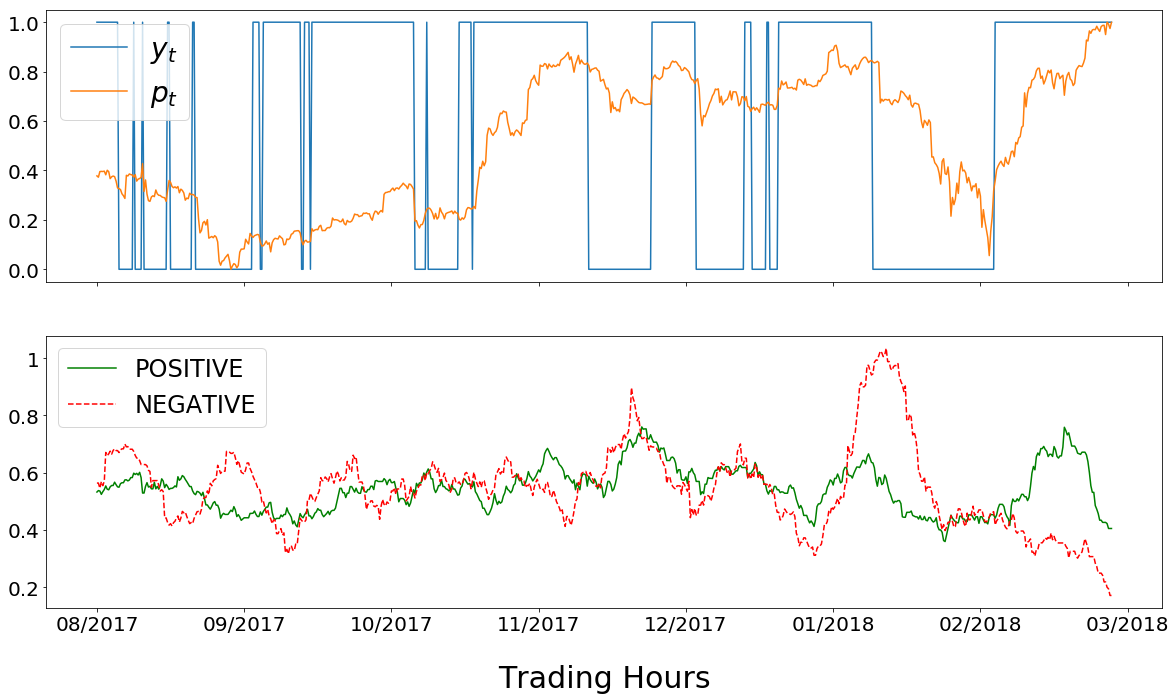

In [14]:
i = 950
e = 1640
labelsR = labels[i:e]
closeR = close[i:e]
posR = pos[i:e]
negR = neg[i:e]
m = min(closeR)
M = max(closeR)
closeR = [ (c-m)/(M-m) for c in closeR]
m = min(posR)
M = max(posR)
posR = [ (c-m)/(M-m) for c in posR]
negR = [ (c-m)/(M-m) for c in negR]


f, axarr = plt.subplots(2,figsize=(20,11), sharex=True)
axarr[0].plot(range(len(labelsR)), labelsR, label='$y_t$')
axarr[0].plot(range(len(labelsR)), closeR, label='$p_t$' )
axarr[0].legend(loc="upper left",  prop={'size': 28})
axarr[1].plot(range(len(labelsR)), [p+0.4 for p in posR],'g', label='POSITIVE')
axarr[1].plot(range(len(labelsR)), negR,'r--', label='NEGATIVE')
axarr[1].legend(loc="upper left",  prop={'size': 24})
axarr[1].set_xticklabels(['a','08/2017','09/2017','10/2017','11/2017','12/2017','01/2018','02/2018', '03/2018'], fontsize=20)
axarr[0].tick_params(labelsize=20)
axarr[1].set_yticklabels(['0','0.2','0.4','0.6','0.8','1'], fontsize=20)
axarr[1].tick_params(labelsize=20)
axarr[1].set_xlabel('Trading Hours', fontsize=30, labelpad=30)

In [ ]:
i = 950
e = 1640
labelsR = labels[i:e]
closeR = close[i:e]
posR = pos[i:e]
negR = neg[i:e]
m = min(closeR)
M = max(closeR)
closeR = [ (c-m)/(M-m) for c in closeR]
m = min(posR)
M = max(posR)
posR = [ (c-m)/(M-m) for c in posR]
negR = [ (c-m)/(M-m) for c in negR]
datesR = dates[i:e]
datesR = matDates.datestr2num(datesR)

f, axarr = plt.subplots(2,figsize=(20,10), sharex=True)
axarr[0].plot_date(datesR, labelsR,  label='y(t)')
axarr[0].plot_date(datesR, closeR, label='p(t)' )
axarr[0].legend(loc="upper left",  prop={'size': 28})
axarr[1].plot_date(datesR, [p+0.4 for p in posR],'g', label='POSITIVE')
axarr[1].plot_date(datesR, negR,'r--', label='NEGATIVE')
axarr[1].legend(loc="upper left",  prop={'size': 24})
# axarr[1].set_yticklabels([])
# axarr[1].set_xticklabels( matDates.datestr2num(datesR), fontsize=24)
# axarr[0].set_yticklabels([])